<a href="https://colab.research.google.com/github/DilshanBotheju/EmotionDetectionUsingTexts-NLP-/blob/EDA%26FeatureEnginnering/EDA%26FeatureEnginnering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connect with google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [21]:
# Load necessary libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk

Loading the dataset

In [3]:
# Load the dataset
file_path = "/content/drive/MyDrive/Emotion, Hate Speech and Violence Detection using NLP/datasets/preprocessed_emotion_dataset.csv"
Emotion_data = pd.read_csv(file_path, encoding="latin-1")

In [4]:
Emotion_data.head()

,label,cleaned_text
0,0,ive learned surround women lift leave feeling ...
1,0,already feel crappy upset situation doesnt help
2,0,feel like lost mourned moved past tears relati...
3,0,could write whole lot im feeling crappy dont t...
4,0,always seem feel inadequate


In [9]:
# Check for null values
Emotion_data.isnull().sum()

,0
label,0
cleaned_text,1
word_count,0
char_count,0


In [10]:
# Remove values
Emotion_data.dropna(inplace=True)

In [11]:
# Check for null values
Emotion_data.isnull().sum()

,0
label,0
cleaned_text,0
word_count,0
char_count,0


Exploratory Data Analysis(EDA)

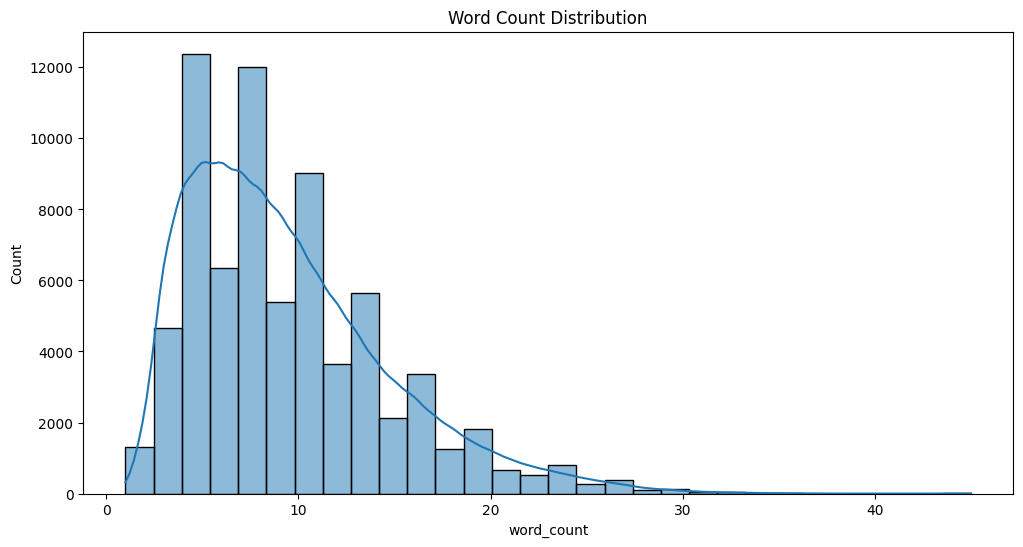

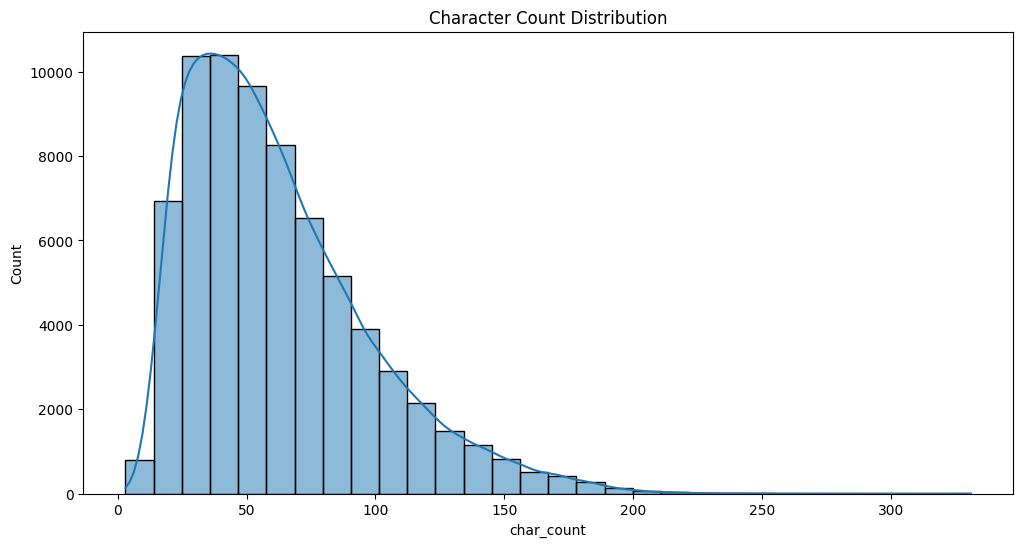

In [12]:
# Visualizing word count and sentence length distribution
Emotion_data["word_count"] = Emotion_data["cleaned_text"].apply(lambda x: len(x.split()))
Emotion_data["char_count"] = Emotion_data["cleaned_text"].apply(lambda x: len(x))

plt.figure(figsize=(12, 6))
sns.histplot(Emotion_data["word_count"], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(Emotion_data["char_count"], bins=30, kde=True)
plt.title("Character Count Distribution")
plt.show()

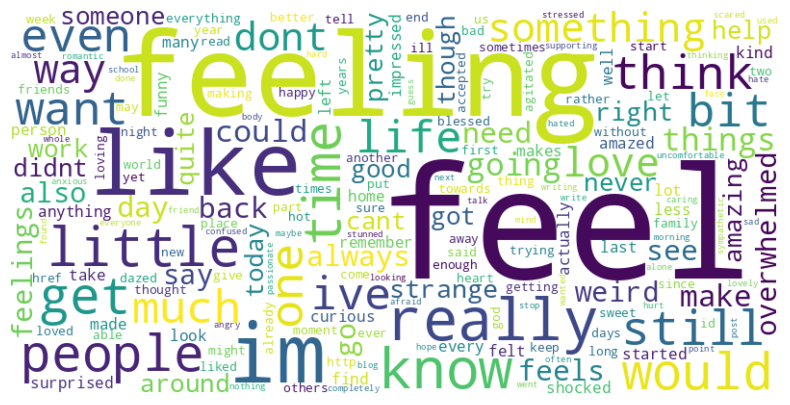

In [15]:
# Visualizing most frequent words
all_words = " ".join(Emotion_data["cleaned_text"])
word_freq = Counter(all_words.split())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [17]:
# Drop uneceassar columns
Emotion_data.drop(["word_count","char_count"], axis=1, inplace=True)

Feature Enginnering

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vecorization of text
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(Emotion_data["cleaned_text"])

print(X_tfidf.shape)

(71999, 5000)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


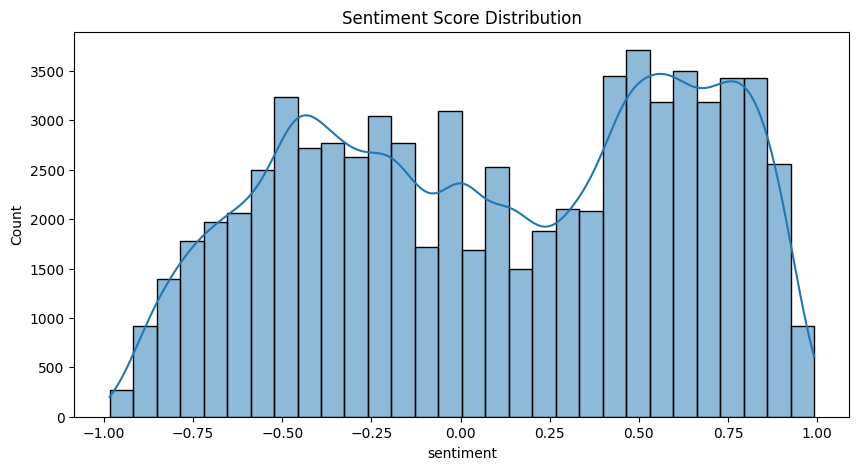

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Sentimental analysis of the dataset
Emotion_data["sentiment"] = Emotion_data["cleaned_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(Emotion_data["sentiment"], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()


In [23]:
# Combine features
X = np.hstack((X_tfidf.toarray(), Emotion_data["sentiment"].values.reshape(-1, 1)))
y = Emotion_data["label"]